In [1]:
# adding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# importing data
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
dataset = data.values
np.random.shuffle(dataset)

# spliting data into train and test samples
r = 0.5
x_train = dataset[0:int(r*len(dataset[:,1])), [1,2,3,4]]
y_train = dataset[0:int(r*len(dataset[:,1])), 5]
x_test = dataset[int(r*len(dataset[:,1])):, [1,2,3,4]]
y_test = dataset[int(r*len(dataset[:,1])):, 5]

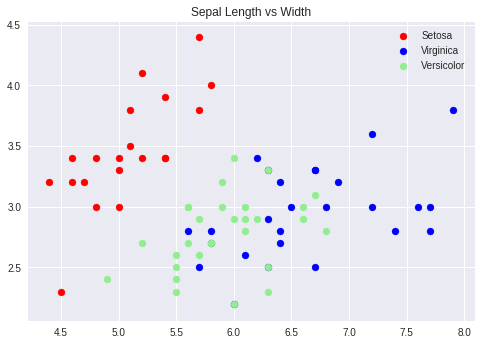

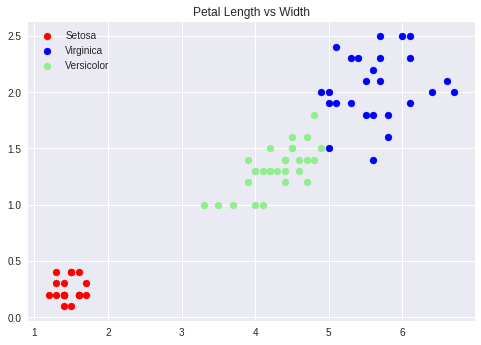

In [3]:
# Training data representation
setosa = np.array([x_train[i,:] for i in range(len(x_train)) if y_train[i]=='Iris-setosa'])
virginica = np.array([x_train[i,:] for i in range(len(x_train)) if y_train[i]=='Iris-virginica'])
versicolor = np.array([x_train[i,:] for i in range(len(x_train)) if y_train[i]=='Iris-versicolor'])

plt.scatter(setosa[:,0], setosa[:,1], color='red', label='Setosa')
plt.scatter(virginica[:,0], virginica[:,1], color='blue', label='Virginica')
plt.scatter(versicolor[:,0], versicolor[:,1], color='lightgreen', label='Versicolor')
plt.title('Sepal Length vs Width')
plt.legend()
plt.show()

plt.scatter(setosa[:,2], setosa[:,3], color='red', label='Setosa')
plt.scatter(virginica[:,2], virginica[:,3], color='blue', label='Virginica')
plt.scatter(versicolor[:,2], versicolor[:,3], color='lightgreen', label='Versicolor')
plt.title('Petal Length vs Width')
plt.legend()
plt.show()

50


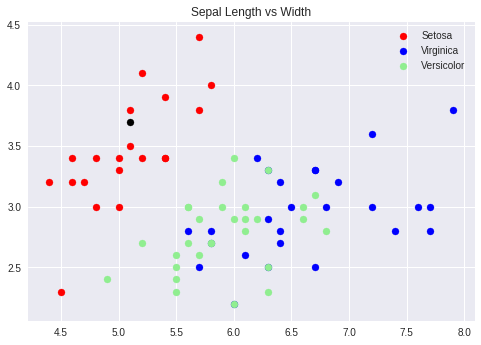

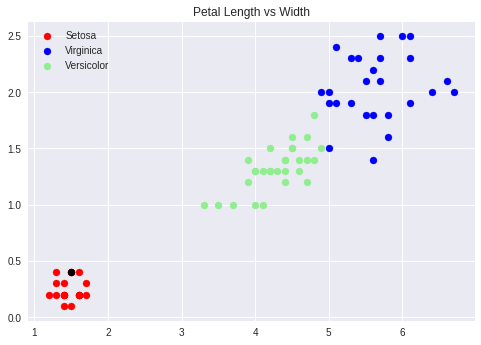

In [4]:
t = random.randint(0, len(x_test)-1)
test_point = x_test[t]
print(t)
plt.scatter(setosa[:,0], setosa[:,1], color='red', label='Setosa')
plt.scatter(virginica[:,0], virginica[:,1], color='blue', label='Virginica')
plt.scatter(versicolor[:,0], versicolor[:,1], color='lightgreen', label='Versicolor')
plt.scatter(test_point[0], test_point[1], color='black')
plt.title('Sepal Length vs Width')
plt.legend()
plt.show()

plt.scatter(setosa[:,2], setosa[:,3], color='red', label='Setosa')
plt.scatter(virginica[:,2], virginica[:,3], color='blue', label='Virginica')
plt.scatter(versicolor[:,2], versicolor[:,3], color='lightgreen', label='Versicolor')
plt.scatter(test_point[2], test_point[3], color='black')
plt.title('Petal Length vs Width')
plt.legend()
plt.show()

## Steps for K Nearest Neighbour
- Select and appropriate value of k
- Find the nearest k elements to the testing data
- Assign the value of element with maximum frequency among those k elements

In [0]:
k = 4
out = []
euclid = lambda a, b: (sum([(a[i] - b[i])**2 for i in range(len(a))])) ** (0.5) 
for leaf in x_test:
  nndist = [157]*k
  nny = ['']*k
  for i in range(len(x_train)):
    dist = euclid(x_train[i], leaf)
    if dist < max(nndist):
      index = nndist.index(max(nndist))
      nndist[index] = dist
      nny[index] = y_train[i]
  elements = {i:nny.count(i) for i in nny}
  out.append(max(elements.keys(), key=(lambda key: elements[key])))


In [6]:
correct = 0
tot = len(x_test)
for i in range(tot):
  if y_test[i]==out[i]:
    correct += 1
accuracy = (correct/tot)*100
print(accuracy)

92.0
